# 회귀(Regression)

예측할 값(Target)이 연속형(continuous) 데이터(float)인 지도 학습(Supervised Learning).

## 회귀의 주요 평가 지표

- ### MSE (Mean Squared Error)
    - 실제 값과 예측값의 차를 제곱해 평균 낸 것
    - scikit-learn 평가함수: mean_squared_error() 
    - 교차검증시 지정할 문자열: 'neg_mean_squared_error'
    $$
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\\
    y_i: 실제값, \hat{y_i}: 모델이 예측한 값
    $$
    

- ### RMSE (Root Mean Squared Error)
    - MSE는 오차의 제곱한 값이므로 실제 오차의 평균보다 큰 값이 나온다.  MSE의 제곱근이 RMSE이다.
    - mean_squared_error() 의 squared=False로 설정해서 계산. 또는 MSE를 구한 뒤 np.sqrt()로 제곱근을 구한다.
    - 교차검증시 지정할 문자열: 'neg_root_mean_squared_error'
    
    $$
    RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
    $$

- ### $R^2$ (R square, 결정계수)
    - 평균으로 예측했을 때 오차(총오차) 보다 모델을 사용했을 때 얼마 만큼 더 좋은 성능을 내는지를 비율로 나타낸 값. 
    - 1에 가까울 수록 좋은 모델.
    - scikit-learn 평가함수: r2_score()
    - 교차검증시 지정할 문자열: 'r2'
    - [참고](https://ko.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/assessing-the-fit-in-least-squares-regression/a/r-squared-intuition)
    $$
    R^2 = \cfrac{\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}\\
    R^2 = 1 - \cfrac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
    $$

- $y_i$ : i번째 정답값, 
- $\hat{y_i}$ : i 번째 예측 값, 
- $\bar{y}$ : y의 평균    

### 예제

##### import

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression # 회귀 문제를 위한 dummy dataset 생성
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression # 선형 회귀 모델

##### Dataset 생성
- make_xxxxx() 함수
    - 머신러닝 학습을 위한 dummy dataset 구현 함수
    - 필요한 설정을 직접하여 테스트할 수 있는 데이터셋을 생성해준다.
- make_regression(): 회귀 문제를 위한 dummy dataset 생성
- make_classification(): 분류 문제를 위한 dummy dataset 생성

In [32]:
X, y = make_regression(n_samples=1000, # 표본의 갯수 
                       n_features=1, # feature의 수
                       # n_targets = 1, # target의 수 def = 1
                       n_informative=1, # feature 중 실제 target과 상관 관계가 있는 수
                       noise=50, # target 에 더해지는 정규 분포의 표준편차
                       random_state=0)

In [33]:
X.shape, y.shape

((1000, 1), (1000,))

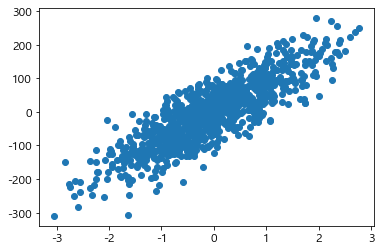

In [34]:
plt.scatter(X, y)

In [35]:
np.mean(y), np.min(y), np.max(y), np.median(y)

(-2.4124246930110305,
 -309.93372019710404,
 278.9216433229993,
 -0.8565443356377808)

##### 모델 생성, 학습, 추론

In [36]:
lr = LinearRegression()
lr.fit(X, y)
pred = lr.predict(X)

##### 평가

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)

print("MSE : ", mse)
print("RMSE : ", np.sqrt(mse))
print('R^2 : ', r2)

MSE :  2461.0377337239934
RMSE :  49.60884733315211
R^2 :  0.7264007364619969


##### 교차검증 (cross validation)

In [49]:
score = cross_val_score(lr, X, y, cv=5) # , scoring = 'r2') 기본값 
print("cv별 R2:", score)
print("평균 R2: ", np.mean(score))

cv별 R2: [0.75601278 0.698025   0.72635497 0.72045804 0.72727316]
평균 R2:  0.7256247907760487


In [45]:
score = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)

print("mse:", score*-1)
print("mse평균: ", np.mean(score)*-1)

mse: [2010.85262268 2838.55092577 2644.84308496 2556.21216438 2309.34464992]
mse평균:  2471.9606895426596


##### 모델이 찾은 계수(coef, 가중치-weigth)와 절편(intercept, 편향-bias) 조회
- LinearRegression 모델이 학습해서 찾는 파라미터 제공 attribute
    - coef_: Feature에 곱하는 가중치
    - intercept_: 모든 Feature가 0일때 예측값

In [50]:
lr.fit(X, y)
print("coef:", lr.coef_, "intercept:",lr.intercept_)

coef: [81.89512864] intercept: 1.2938791888157457


##### X, y와 추론결과  시각화

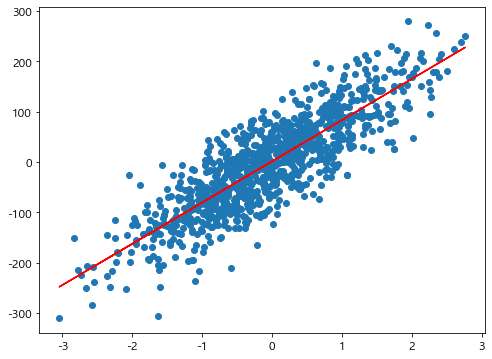

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(X, y)

# y_hat = X*lr.coef_ + lr.intercept_
y_hat = lr.predict(X)

plt.plot(X, y_hat, color='red')
plt.show()

## 기존 분류 모델의 회귀 모델

##### import

In [55]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### 모델들 생성

In [56]:
knn_reg = KNeighborsRegressor(n_neighbors=3)
tree_reg = DecisionTreeRegressor(max_depth=5)
rf_reg = RandomForestRegressor(n_estimators=300, max_depth=2)
gb_reg = GradientBoostingRegressor(n_estimators=200, max_depth=1)
lr_reg = LinearRegression()

estimators = [("knn",knn_reg),
              ('decision tree',tree_reg), 
              ('random forest',rf_reg), 
              ('Gradient Boosting', gb_reg), 
              ('linear reg',lr_reg)]

##### 평가출력 함수

In [57]:
# %%writefile metrics.py
# %load metrics.py


In [58]:
# def print_regression_metrics(y, y_pred, title=None):
#     mse = mean_squared_error(y, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y, y_pred)
#     if title:
#         print(title)
#     print(f"MSE:{mse}, RMSE:{rmse}, R Square:{r2}")

In [59]:
from metrics import print_regression_metrics as print_metrics

##### 모델 학습 및 평가

In [60]:
for name, model in estimators:
#     학습
    model.fit(X_train, y_train)
#     추론
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
#     평가
    print_metrics(y_train, pred_train, name+" - Train")
    print_metrics(y_test, pred_test, name+" - Test")
    print("-------------------------------------------")

knn - Train
MSE:1679.6187250500195, RMSE:40.98315172177488, R Square:0.8184828910339228
knn - Test
MSE:3442.396313867112, RMSE:58.67193804423979, R Square:0.5594566421799264
-------------------------------------------
decision tree - Train
MSE:2217.4084565943126, RMSE:47.0893667041118, R Square:0.7603637263415575
decision tree - Test
MSE:2783.782970499863, RMSE:52.76156717251548, R Square:0.6437431993736178
-------------------------------------------
random forest - Train
MSE:2756.0020475553924, RMSE:52.49763849503511, R Square:0.7021576882206132
random forest - Test
MSE:2701.713388346681, RMSE:51.97800869932092, R Square:0.654246118270843
-------------------------------------------
Gradient Boosting - Train
MSE:2308.134948570383, RMSE:48.04305307295096, R Square:0.7505588758213062
Gradient Boosting - Test
MSE:2400.6902945745173, RMSE:48.996839638639116, R Square:0.6927697838864388
-------------------------------------------
linear reg - Train
MSE:2498.9189752885563, RMSE:49.9891885840

##### Voting
- VotingRegressor 
    - 각 모델이 예측한 값의 평균을 반환한다.

In [61]:
knn_reg = KNeighborsRegressor(n_neighbors=3)
tree_reg = DecisionTreeRegressor(max_depth=2)
rf_reg = RandomForestRegressor(n_estimators=200, max_depth=2)
gb_reg = GradientBoostingRegressor(n_estimators=200, max_depth=1)
lr_reg = LinearRegression()

estimators = [("knn",knn_reg), ('random forest',rf_reg), ('Gradient Boosting', gb_reg), ('linear reg',lr_reg)]

vote_reg = VotingRegressor(estimators)
vote_reg.fit(X_train, y_train)

pred_train = vote_reg.predict(X_train)
pred_test = vote_reg.predict(X_test)

In [62]:
print_metrics(y_train, pred_train)
print_metrics(y_test, pred_test)

MSE:2094.9472696702032, RMSE:45.77059394054444, R Square:0.7735981588228675
MSE:2486.761145329778, RMSE:49.867435720415564, R Square:0.6817547995136612


##### DecisionTreeRegressor Tree 시각화

In [63]:
tree_reg = DecisionTreeRegressor(max_depth=3)

In [64]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [65]:
from sklearn.tree import export_graphviz
from graphviz import Source
graph = Source(export_graphviz(tree_reg, 
                               out_file=None,
                               rounded=True, filled=True))
# display(SVG(graph.pipe(format='svg')))
graph

ModuleNotFoundError: No module named 'graphviz'

In [66]:
tree_reg.feature_importances_

array([1.])